In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv("extracted.csv")

In [3]:
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

In [4]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

In [5]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [11]:
from tensorflow.keras import layers, models

# Input layer - use the correct shape for your tabular data
inputs = tf.keras.Input(shape=(17,))  # 17 features

# Dense layers instead of Conv2D
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)

# Output layer for binary classification
outputs = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=32,
                   validation_split=0.2)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7226 - loss: 0.5366 - val_accuracy: 0.7795 - val_loss: 0.4843
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.3823 - val_accuracy: 0.8057 - val_loss: 0.4768
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.3628 - val_accuracy: 0.8093 - val_loss: 0.4624
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8381 - loss: 0.3589 - val_accuracy: 0.8033 - val_loss: 0.4685
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3518 - val_accuracy: 0.8093 - val_loss: 0.4688
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3200 - val_accuracy: 0.8093 - val_loss: 0.5014
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8764 - loss: 0.3046 - val_accuracy: 0.8045 - val_loss: 0.5064
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8794 - loss: 0.2761 - val_accuracy: 0.

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 79.98%

Classification Report:
              precision    recall  f1-score   support

      female       0.73      0.75      0.74       673
        male       0.85      0.83      0.84      1125

    accuracy                           0.80      1798
   macro avg       0.79      0.79      0.79      1798
weighted avg       0.80      0.80      0.80      1798


Confusion Matrix:
[[503 170]
 [190 935]]


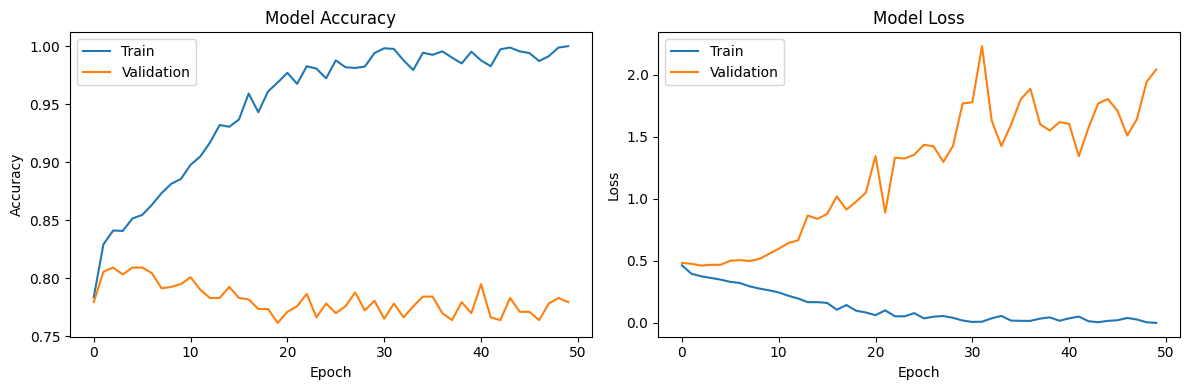


Additional Metrics:
Precision: 0.8462
Recall: 0.8311
F1 Score: 0.8386


In [13]:
# 1. Get model predictions
y_pred_probs = model.predict(X_test)  # Get probability predictions
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# 2. Calculate accuracy using multiple methods
# Method 1: Using sklearn metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Method 2: Get detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['female', 'male']))

# Method 3: Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# 4. Visualize training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# 5. Calculate and print additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [14]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy using model.evaluate: {test_accuracy*100:.2f}%")


Test accuracy using model.evaluate: 79.98%
